In [1]:
import numpy as np
import pandas as pd

#!pip install xgboost
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

#!pip install shap
import matplotlib.pyplot as plt

In [2]:
fTest = pd.read_csv('test.csv')
fTest.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [3]:
dfTrain=pd.read_csv('train.csv')
dfTrain.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
var_columns=[c for c in dfTrain.columns if c not in ['ID_code', 'target']]
X = dfTrain.loc[:, var_columns]
y=dfTrain.loc[:, 'target']
X_train, X_valid, y_train, y_valid = train_test_split (X,y, test_size=.2)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((160000, 200), (40000, 200), (160000,), (40000,))

In [5]:
xgb.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [6]:
#This is the edited version for my params, added parallel trees and tree method
#model_xgboost = xgb.XGBClassifier(learning_rate=.01,
#                                     max_depth=5,
#                                     n_estimators=1000,
#                                     subsample=.5,
#                                     colsample_bytree=.5,
#                                    eval_metric='auc',
#                                     verbosity=1,
#                                     random_state=1)
model_xgboost = xgb.XGBClassifier(learning_rate=.01,
                                     max_depth=5,
                                     n_estimators=1000,
                                     subsample=.5,
                                     colsample_bytree=.5,
                                     eval_metric='auc',
                                     num_parallel_tree=3,
                                     tree_method='hist', 
                                     random_state=1)


eval_set =[(X_valid, y_valid)]

model_xgboost.fit(X_train,
                 y_train,
                 early_stopping_rounds=10,
                 eval_set=eval_set,
                 verbose=True)

C:\Users\MW\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.68220
[1]	validation_0-auc:0.70220
[2]	validation_0-auc:0.71060
[3]	validation_0-auc:0.72102
[4]	validation_0-auc:0.72124
[5]	validation_0-auc:0.72189
[6]	validation_0-auc:0.72330
[7]	validation_0-auc:0.72400
[8]	validation_0-auc:0.72629
[9]	validation_0-auc:0.72565
[10]	validation_0-auc:0.72630
[11]	validation_0-auc:0.72643
[12]	validation_0-auc:0.72743
[13]	validation_0-auc:0.72749
[14]	validation_0-auc:0.72909
[15]	validation_0-auc:0.73065
[16]	validation_0-auc:0.73033
[17]	validation_0-auc:0.73093
[18]	validation_0-auc:0.73151
[19]	validation_0-auc:0.73200
[20]	validation_0-auc:0.73305
[21]	validation_0-auc:0.73319
[22]	validation_0-auc:0.73421
[23]	validation_0-auc:0.73473
[24]	validation_0-auc:0.73461
[25]	validation_0-auc:0.73468
[26]	validation_0-auc:0.73465
[27]	validation_0-auc:0.73583
[28]	validation_0-auc:0.73637
[29]	validation_0-auc:0.73683
[30]	validation_0-auc:0.73691
[31]	validation_0-auc:0.73628
[32]	validation_0-auc:0.73668
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=3,
              predictor='auto', random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='hist',
              validate_parameters=1, verbosity=None)

# Evaluate Model Performance

In [7]:
y_train_pred = model_xgboost.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost.predict_proba(X_valid)[:,1]

print("AUC Train: {:.4f}\nAUC Valid {:.4f}".format(roc_auc_score(y_train, y_train_pred), roc_auc_score(y_valid,y_valid_pred)))

AUC Train: 0.9166
AUC Valid 0.8595


# Hyperparameter Tuning

In [8]:
learning_rate_list = [0.02, 0.05]
max_depth_list = [2,3]
#This was taking too long so set the numbers lower
#n_estimators_list = [1000, 2000, 3000]
n_estimators_list = [1000, 2000]
params_dict = {'learning_rate' : learning_rate_list,
               'max_depth': max_depth_list,
               'n_estimators': n_estimators_list}
num_combinations=1
for v in params_dict.values(): num_combinations  *= len (v)
    
print(num_combinations)
params_dict

8


{'learning_rate': [0.02, 0.05],
 'max_depth': [2, 3],
 'n_estimators': [1000, 2000]}

In [9]:
def my_roc_auc_score(model, X, y): return roc_auc_score(y, model.predict_proba(X)[:,1])
model_xgboost_hp= GridSearchCV(estimator=xgb.XGBClassifier(subsample=.5,
                                                          colsample_bytree=.25,
                                                          eval_metric='auc',
                                                          use_label_encoder=False),
                              param_grid=params_dict,
                              cv=2,
                              scoring=my_roc_auc_score,
                              return_train_score=True,
                              verbose=4)
model_xgboost_hp.fit(X,y)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=1000; total time= 2.5min
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=1000; total time= 2.6min
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=2000; total time= 5.1min
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=2000; total time= 5.0min
[CV 1/2] END learning_rate=0.02, max_depth=3, n_estimators=1000; total time= 3.6min
[CV 2/2] END learning_rate=0.02, max_depth=3, n_estimators=1000; total time= 3.9min
[CV 1/2] END learning_rate=0.02, max_depth=3, n_estimators=2000; total time= 7.0min
[CV 2/2] END learning_rate=0.02, max_depth=3, n_estimators=2000; total time= 8.3min
[CV 1/2] END learning_rate=0.05, max_depth=2, n_estimators=1000; total time= 2.9min
[CV 2/2] END learning_rate=0.05, max_depth=2, n_estimators=1000; total time= 2.9min
[CV 1/2] END learning_rate=0.05, max_depth=2, n_estimators=2000; total time= 6.7min
[CV 2/2] END lea

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.25,
                                     enable_categorical=False,
                                     eval_metric='auc', gamma=None, gpu_id=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                    

In [10]:
df_cv_results = pd.DataFrame(model_xgboost_hp.cv_results_)
df_cv_reults = df_cv_results[['rank_test_score', 'mean_test_score', 'param_learning_rate', 'param_max_depth', 'param_n_estimators' ]]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
5,397.627730,4.613018,1.102929,0.008698,0.05,2,2000,"{'learning_rate': 0.05, 'max_depth': 2, 'n_est...",0.892328,0.896685,0.894507,0.002179,1,0.929390,0.926629,0.928009,0.001380
7,646.817032,111.148239,1.543564,0.218187,0.05,3,2000,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",0.892382,0.896338,0.894360,0.001978,2,0.957392,0.955967,0.956679,0.000712
6,268.154362,1.183970,0.859521,0.003083,0.05,3,1000,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",0.887448,0.892372,0.889910,0.002462,3,0.937475,0.935528,0.936502,0.000973
3,457.673072,38.312653,1.324232,0.184281,0.02,3,2000,"{'learning_rate': 0.02, 'max_depth': 3, 'n_est...",0.885869,0.891396,0.888632,0.002764,4,0.932850,0.930067,0.931459,0.001392
4,173.702061,1.280024,0.703145,0.127711,0.05,2,1000,"{'learning_rate': 0.05, 'max_depth': 2, 'n_est...",0.880685,0.886368,0.883527,0.002842,5,0.911708,0.908575,0.910142,0.001566
1,302.729824,5.240460,0.811330,0.017453,0.02,2,2000,"{'learning_rate': 0.02, 'max_depth': 2, 'n_est...",0.876270,0.882453,0.879362,0.003092,6,0.906284,0.902976,0.904630,0.001654
2,222.396456,9.412084,0.689157,0.043884,0.02,3,1000,"{'learning_rate': 0.02, 'max_depth': 3, 'n_est...",0.868211,0.874179,0.871195,0.002984,7,0.907880,0.904469,0.906175,0.001705
0,151.349751,2.807000,0.499149,0.007496,0.02,2,1000,"{'learning_rate': 0.02, 'max_depth': 2, 'n_est...",0.853402,0.859744,0.856573,0.003171,8,0.879674,0.876151,0.877912,0.001761


Text(0.5, 1.0, 'Performance wrt # of Trees and Depth')

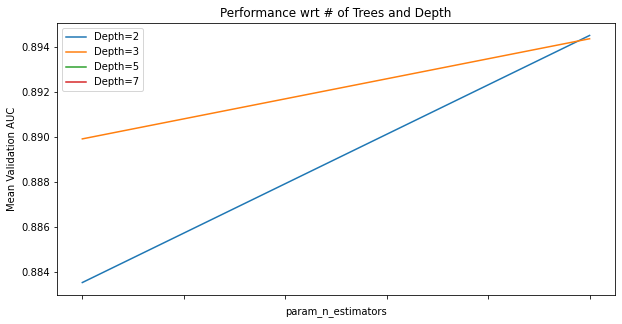

In [11]:
df_cv_results.sort_values(by='param_n_estimators', inplace=True)

lr_d2 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05)& (df_cv_results['param_max_depth']==2)]
lr_d3 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05)& (df_cv_results['param_max_depth']==3)]
lr_d5 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05)& (df_cv_results['param_max_depth']==5)]
lr_d7 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05)& (df_cv_results['param_max_depth']==7)]

fig, ax=plt.subplots(figsize=(10,5))

lr_d2.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)
lr_d3.plot(x='param_n_estimators', y='mean_test_score', label='Depth=3', ax=ax)
lr_d5.plot(x='param_n_estimators', y='mean_test_score', label='Depth=5', ax=ax)
lr_d7.plot(x='param_n_estimators', y='mean_test_score', label='Depth=7', ax=ax)
plt.ylabel('Mean Validation AUC')

plt.title('Performance wrt # of Trees and Depth')


Text(0.5, 1.0, 'Performance wrt learning rate')

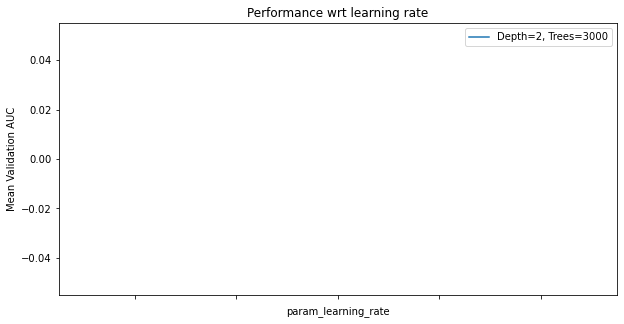

In [12]:
df_cv_results.sort_values(by='param_learning_rate', inplace=True)
lr_t3k_d2=df_cv_results.loc[(df_cv_results['param_n_estimators']==300)&(df_cv_results['param_max_depth']==2)]
fig, ax = plt.subplots(figsize=(10,5))

lr_t3k_d2.plot(x='param_learning_rate', y= 'mean_test_score', label='Depth=2, Trees=3000', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt learning rate')

In [17]:
df_cv_results.to_csv('model2.csv')

Score the data